## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
# Separando os dados em validação e teste

X = boston.drop(columns = ['medv'])
y = boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [3]:
# Criando e treinando arvore

regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

DecisionTreeRegressor()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [4]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 2.99965271e-16, 8.99895813e-16, 1.19986108e-15,
       1.49982636e-15, 2.39972217e-15, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
       1.31926121e-05, 1.75901495e-05, 1.75901495e-05, 1.75901495e-05,
       1.75901495e-05, 1.75901495e-05, 3.95778364e-05, 3.95778364e-05,
       5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
       5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
       5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
       5.27704485e-05, 5.27704486e-05, 7.91556728e-05, 1.06420405e-04,
       1.07739666e-04, 1.09938434e-04, 1.09938434e-04, 1.09938434e-04,
      

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [5]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [6]:
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

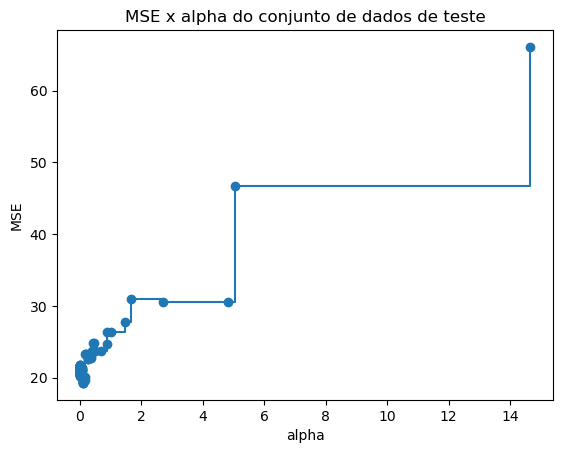

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de teste")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
plt.show()

#### Ponto escolhido: 1.31926121e-05

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [8]:
clf_podada = DecisionTreeRegressor(random_state=100, ccp_alpha= 1.31926121e-05)
clf_podada.fit(X_train, y_train)
clf_podada.score(X_test, y_test)

0.7446989212496713

### 7. Visualize esta árvore.

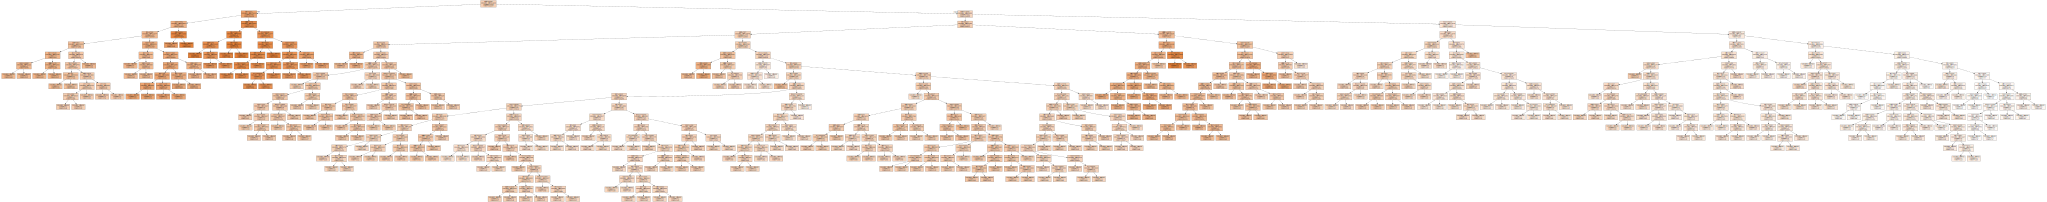

In [9]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_podada, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph